In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imageurl = "/content/drive/My Drive/AI-Project/image_part_001.jpg"
groundtruthimage = "/content/drive/My Drive/AI-Project/image_part_001.png"

In [ ]:
import numpy as np
import cv2
import pandas as pd



In [ ]:
# import urllib.request

# imageurl="https://www.homemade-gifts-made-easy.com/image-files/xnewspaper-generator-katie-nicholson-old-800x659.jpg.pagespeed.ic.wsKiQMkU82.jpg"
# urllib.request.urlretrieve(imageurl, "img1.jpg")

image1 = cv2.imread(imageurl)



In [ ]:
image1

array([[[174, 164, 157],
        [187, 177, 170],
        [160, 148, 146],
        ...,
        [ 44,  43,  52],
        [ 52,  51,  60],
        [103, 103, 109]],

       [[204, 194, 187],
        [190, 179, 175],
        [187, 175, 173],
        ...,
        [ 49,  48,  57],
        [ 55,  54,  63],
        [120, 120, 126]],

       [[202, 193, 189],
        [176, 167, 163],
        [179, 167, 165],
        ...,
        [ 52,  51,  60],
        [ 57,  56,  65],
        [130, 130, 136]],

       ...,

       [[189, 189, 195],
        [198, 198, 204],
        [189, 192, 197],
        ...,
        [130, 134, 139],
        [ 94,  98, 103],
        [ 86,  92,  97]],

       [[191, 191, 197],
        [192, 195, 200],
        [188, 191, 196],
        ...,
        [215, 219, 220],
        [156, 161, 164],
        [121, 126, 129]],

       [[198, 201, 206],
        [198, 201, 206],
        [191, 193, 201],
        ...,
        [198, 203, 202],
        [114, 119, 120],
        [ 87,  92,  93]]

In [ ]:
image1.shape

(2061, 1817, 3)

In [ ]:
#converting to gray
image_grey1=cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)

In [ ]:
image_grey1

array([[163, 176, 149, ...,  46,  54, 105],
       [193, 179, 176, ...,  51,  57, 122],
       [193, 167, 168, ...,  54,  59, 132],
       ...,
       [191, 200, 193, ..., 135,  99,  93],
       [193, 196, 192, ..., 219, 161, 126],
       [202, 202, 195, ..., 202, 119,  92]], dtype=uint8)

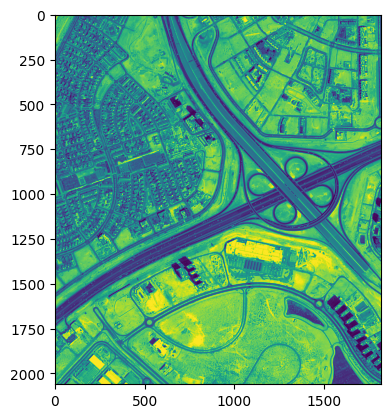

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image_grey1)

In [ ]:
#Creating a dataframe
df=pd.DataFrame()

In [ ]:
#Adding the features to the dataframe

#1)Adding original pixel values to the dataframe ad feature no. 1
#reahaping the image into 1 dimension by wrapping it so that it can be added to the dataframe
imagegrey1_reshaped = image_grey1.reshape(-1)
df['Original Image'] = imagegrey1_reshaped


In [ ]:
image_grey1.shape

(2061, 1817)

In [ ]:
len(imagegrey1_reshaped)

3744837

In [ ]:
#2) generating the Gabor features and gabor Feature the the dataframe
num = 1
kernels = []
for theta in range(2):
  theta = theta / 4. * np.pi
  for sigma in (1,3):
    for lamda in np.arange( 0 , np.pi , np.pi/4):
      for gamma in (0.05, 0.5):

        gabor_label = 'Gabor' + str(num)

        ksize = 5
        kernel = cv2.getGaborKernel((ksize,ksize),sigma, theta , lamda , gamma,0,ktype= cv2.CV_32F)
        kernels.append(kernel)
        #now applying the filter on image and adding vales to the new column
        fimg = cv2.filter2D(imagegrey1_reshaped,cv2.CV_8UC3,kernel)
        filtered_img = fimg.reshape(-1)
        df[gabor_label] = filtered_img
        print(gabor_label , ': theta = ',theta,': sigma = ', ': lamda = ',lamda,": gamma = ",gamma)
        num=num+1

Gabor1 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor2 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor3 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor4 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor5 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor6 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.5
Gabor7 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.05
Gabor8 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.5
Gabor9 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor10 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor11 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor12 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor13 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor14 : theta =  0.0 : sigma =  : l

In [ ]:
df.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             163       0       0     255     255     136     110      64   
1             176       0       0     255     255     142     112      66   
2             149       0       0     255     255     146     115      69   
3             182       0       0     255     255     151     120      71   
4             205       0       0     255     255     156     126      73   

   Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  \
0      51       0  ...      255      109        0        0      255      255   
1      53       0  ...      255      107        0        0      255      255   
2      54       0  ...      255      114        0        0      255      255   
3      56       0  ...      255      116        0        0      255      255   
4      59       0  ...      255      121        0        0      255      255   

   Gabor29  Gabor30  Gabor31  Gabor32  
0       53       42      176      158  
1      116      100      198      177  
2       79       64      248      225  
3      101       85      213      190  
4       96       82      185      164  

[5 rows x 33 columns]

In [ ]:
#3) Adding Canny Edge filter- edge detection filter
edges = cv2.Canny(image_grey1,100,200)
edges_reshaped = edges.reshape(-1)
df['Canny Edge'] = edges_reshaped

In [ ]:
df.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             208       0       0     255     255     174     139      82   
1             208       0       0     255     255     174     139      82   
2             208       0       0     255     255     174     139      82   
3             208       0       0     255     255     174     139      82   
4             209       0       0     255     255     175     140      82   

   Gabor8  Gabor9  ...  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  Gabor29  \
0      65       0  ...      135        0        0      255      255      106   
1      65       0  ...      135        0        0      255      255      106   
2      65       0  ...      135        0        0      255      255      106   
3      65       0  ...      135        0        0      255      255      106   
4      66       0  ...      136        0        0      255      255      107   

   Gabor30  Gabor31  Gabor32  Canny Edge  
0       89      243      218           0  
1       89      243      218           0  
2       90      244      218           0  
3       89      245      219           0  
4       90      245      220           0  

[5 rows x 34 columns]

In [ ]:
from skimage.filters import roberts , sobel , scharr , prewitt

In [ ]:
edge_roberts = roberts(image_grey1)
edge_roberts_reshaped = edge_roberts.reshape(-1)
df['Roberts']=edge_roberts_reshaped

In [ ]:
edge_sobel = sobel(image_grey1)
edge_sobel_reshaped = edge_sobel.reshape(-1)
df['Sobel']=edge_sobel_reshaped

In [ ]:
edge_scharr = scharr(image_grey1)
edge_scharr_reshaped = edge_scharr.reshape(-1)
df['Scharr']=edge_scharr_reshaped

In [ ]:
edge_prewitt = prewitt(image_grey1)
edge_prewitt_reshaped = edge_prewitt.reshape(-1)
df['Prewitt']=edge_prewitt_reshaped

In [ ]:
df.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             255       0       0     255     255     213     170     100   
1             255       0       0     255     255     213     170     100   
2             255       0       0     255     255     213     170     100   
3             255       0       0     255     255     213     170     100   
4             255       0       0     255     255     213     170     100   

   Gabor8  Gabor9  ...  Gabor28  Gabor29  Gabor30  Gabor31  Gabor32  \
0      80       0  ...      255      130      109      255      255   
1      80       0  ...      255      130      109      255      255   
2      80       0  ...      255      130      109      255      255   
3      80       0  ...      255      130      109      255      255   
4      80       0  ...      255      130      109      255      255   

   Canny Edge  Roberts  Sobel  Scharr       Prewitt  
0           0      0.0    0.0     0.0  7.850462e-17  
1           0      0.0    0.0     0.0  7.850462e-17  
2           0      0.0    0.0     0.0  7.850462e-17  
3           0      0.0    0.0     0.0  7.850462e-17  
4           0      0.0    0.0     0.0  7.850462e-17  

[5 rows x 38 columns]

In [ ]:
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(image_grey1,sigma=3)
gaussian_img_reshaped = gaussian_img.reshape(-1)
df['Gaussian s3']=gaussian_img_reshaped

In [ ]:
gaussian_img2 = nd.gaussian_filter(image_grey1,sigma=7)
gaussian_img2_reshaped = gaussian_img2.reshape(-1)
df['Gaussian s7']=gaussian_img2_reshaped

In [ ]:
median_img =  nd.median_filter(image_grey1,size=3)
median_img_reshaped = median_img.reshape(-1)
df['Median s3']=median_img_reshaped

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744837 entries, 0 to 3744836
Data columns (total 41 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Original Image  uint8  
 1   Gabor1          uint8  
 2   Gabor2          uint8  
 3   Gabor3          uint8  
 4   Gabor4          uint8  
 5   Gabor5          uint8  
 6   Gabor6          uint8  
 7   Gabor7          uint8  
 8   Gabor8          uint8  
 9   Gabor9          uint8  
 10  Gabor10         uint8  
 11  Gabor11         uint8  
 12  Gabor12         uint8  
 13  Gabor13         uint8  
 14  Gabor14         uint8  
 15  Gabor15         uint8  
 16  Gabor16         uint8  
 17  Gabor17         uint8  
 18  Gabor18         uint8  
 19  Gabor19         uint8  
 20  Gabor20         uint8  
 21  Gabor21         uint8  
 22  Gabor22         uint8  
 23  Gabor23         uint8  
 24  Gabor24         uint8  
 25  Gabor25         uint8  
 26  Gabor26         uint8  
 27  Gabor27         uint8  
 28  Gabor28     

In [ ]:
ground_truth1=cv2.imread(groundtruthimage)

In [ ]:
ground_truth1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
ground_truth1.shape

(2061, 1817, 3)

In [ ]:
ground_truth1_grey = cv2.cvtColor(ground_truth1,cv2.COLOR_BGR2GRAY)
ground_truth1_grey

array([[ 92,  92,  92, ..., 172, 172, 172],
       [ 92,  92,  92, ..., 172, 172, 172],
       [ 92,  92,  92, ..., 172, 172, 172],
       ...,
       [ 92,  92,  92, ..., 172, 172, 172],
       [ 92,  92,  92, ..., 172, 172, 172],
       [ 92,  92,  92, ...,  92, 172, 172]], dtype=uint8)

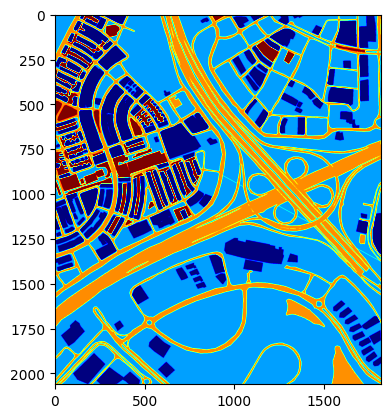

In [ ]:
plt.imshow(ground_truth1_grey,cmap="jet")

In [ ]:
ground_truth1_grey_reshaped=ground_truth1_grey.reshape(-1)
df['Labels']=ground_truth1_grey_reshaped

In [ ]:
len(ground_truth1_grey_reshaped)

3744837

In [ ]:
df.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             255       0       0     255     255     213     170     100   
1             255       0       0     255     255     213     170     100   
2             255       0       0     255     255     213     170     100   
3             255       0       0     255     255     213     170     100   
4             255       0       0     255     255     213     170     100   

   Gabor8  Gabor9  ...  Canny Edge  Roberts  Sobel  Scharr       Prewitt  \
0      80       0  ...           0      0.0    0.0     0.0  7.850462e-17   
1      80       0  ...           0      0.0    0.0     0.0  7.850462e-17   
2      80       0  ...           0      0.0    0.0     0.0  7.850462e-17   
3      80       0  ...           0      0.0    0.0     0.0  7.850462e-17   
4      80       0  ...           0      0.0    0.0     0.0  7.850462e-17   

   Gaussian s3  Gaussian s7  Median s3  Variance s3  Labels  
0          255          253        255            0     255  
1          255          253        255            0     255  
2          255          253        255            0     255  
3          255          253        255            0     255  
4          255          253        255            0     255  

[5 rows x 43 columns]

In [ ]:
csvpath="/content/drive/My Drive/AI-Project/finaldata.csv"
df.to_csv(csvpath, index=False)

In [ ]:
import dask.dataframe as dd

df2=dd.read_paraquet(csvpath)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


AttributeError: module 'dask.dataframe' has no attribute 'read_paraquet'

In [ ]:
#seperating the independent and dependent variables
#dependent variable
y=df['Labels']
#independent variables
x=df.drop(['Labels'],axis=1)

In [ ]:
x.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             163       0       0     255     255     136     110      64   
1             176       0       0     255     255     142     112      66   
2             149       0       0     255     255     146     115      69   
3             182       0       0     255     255     151     120      71   
4             205       0       0     255     255     156     126      73   

   Gabor8  Gabor9  ...  Gabor31  Gabor32  Canny Edge   Roberts     Sobel  \
0      51       0  ...      176      158           0  0.064736  0.066760   
1      53       0  ...      198      177           0  0.083189  0.059836   
2      54       0  ...      248      225           0  0.109418  0.047516   
3      56       0  ...      213      190         255  0.052099  0.127262   
4      59       0  ...      185      164           0  0.025565  0.029769   

     Scharr   Prewitt  Gaussian s3  Gaussian s7  Median s3  
0  0.072569  0.059279          176          184        176  
1  0.053331  0.069324          177          184        176  
2  0.054595  0.038523          179          185        176  
3  0.134482  0.117647          181          186        182  
4  0.033836  0.026290          184          187        192  

[5 rows x 41 columns]

In [ ]:
#splitting the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=42)

In [ ]:
x_train.shape

(2246902, 41)

In [ ]:
x_test.shape

(1497935, 41)

In [ ]:
# #importing and training the model
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10, random_state=42)
# model.fit(x_train,y_train)

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=10,random_state=42,warm_start=True)

# Define chunk size
chunk_size = 100000

iter=1
# # Iterate over chunks
for i in range(0, len(x_train), chunk_size):
    # Get the current chunk
    print(f"Iteration {iter}.")
    x_train_chunk = x_train.iloc[i:i + chunk_size]
    y_train_chunk = y_train.iloc[i:i + chunk_size]

    # Train the model on the current chunk
    model.fit(x_train_chunk, y_train_chunk)
    iter+=1

Iteration 1.
Iteration 2.
Iteration 3.
Iteration 4.
Iteration 5.
Iteration 6.
Iteration 7.
Iteration 8.
Iteration 9.
Iteration 10.
Iteration 11.
Iteration 12.
Iteration 13.
Iteration 14.
Iteration 15.
Iteration 16.
Iteration 17.
Iteration 18.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new t

Iteration 19.
Iteration 20.
Iteration 21.
Iteration 22.
Iteration 23.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [ ]:
#calculating the accuracy
y_pred=[]

chunk_size = 100000

iter=1
# Iterate over chunks
# for i in range(0, len(x_test), chunk_size):
#     # Get the current chunk
#     print(f"Iteration {iter}.")
#     x_test_chunk = x_test.iloc[i:i + chunk_size]
#     y_pred_chunk=model.predict(x_test_chunk)
#     y_pred.extend(y_pred_chunk)
#     # Train the model on the current chunk
#     iter+=1

# Check the number of features in each chunk
for i in range(0, len(x_test), chunk_size):
    x_test_chunk = x_test.iloc[i:i + chunk_size]
    print(f"Chunk {i//chunk_size+1} shape: {x_test_chunk.shape}")

# Ensure all chunks have the same number of features
num_features = x_test.iloc[:chunk_size].shape[1]
for i in range(0, len(x_test), chunk_size):
    x_test_chunk = x_test.iloc[i:i + chunk_size]
    assert x_test_chunk.shape[1] == num_features, f"Feature mismatch at chunk {i//chunk_size+1}"


Chunk 1 shape: (100000, 41)
Chunk 2 shape: (100000, 41)
Chunk 3 shape: (100000, 41)
Chunk 4 shape: (100000, 41)
Chunk 5 shape: (100000, 41)
Chunk 6 shape: (100000, 41)
Chunk 7 shape: (100000, 41)
Chunk 8 shape: (100000, 41)
Chunk 9 shape: (100000, 41)
Chunk 10 shape: (100000, 41)
Chunk 11 shape: (100000, 41)
Chunk 12 shape: (100000, 41)
Chunk 13 shape: (100000, 41)
Chunk 14 shape: (100000, 41)
Chunk 15 shape: (97935, 41)


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred.shape

(1497935,)

In [ ]:
y_test.shape

(1497935,)

In [ ]:
#Evaluating

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[138680  77958    281  39359   5101]
 [ 65828 717692    209  41042   2564]
 [  1522   1130   3217   8379    301]
 [ 37878  49701   2282 237165   5613]
 [ 20685   9293    207  24991   6857]]
              precision    recall  f1-score   support

          45       0.52      0.53      0.53    261379
          92       0.84      0.87      0.85    827335
         171       0.52      0.22      0.31     14549
         172       0.68      0.71      0.69    332639
         212       0.34      0.11      0.17     62033

    accuracy                           0.74   1497935
   macro avg       0.58      0.49      0.51   1497935
weighted avg       0.72      0.74      0.73   1497935

0.7367549326239122


In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train_list = y_train.tolist()
y_pred_list = y_test.tolist()
predicted_image_list = y_train_list + y_pred_list
len(predicted_image_list)
predicted_image = np.array(predicted_image_list)

In [ ]:
model.feature_importances_

array([0.05485568, 0.        , 0.        , 0.00857394, 0.01356227,
       0.02006649, 0.02030962, 0.01835171, 0.03814264, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06693075, 0.0218014 , 0.        , 0.        , 0.00088484,
       0.00400588, 0.03042221, 0.0180342 , 0.09144415, 0.04296115,
       0.        , 0.        , 0.00311441, 0.00092489, 0.0309043 ,
       0.03051754, 0.02813277, 0.02913177, 0.0043861 , 0.04328257,
       0.04603782, 0.05099405, 0.05181439, 0.11836168, 0.0709773 ,
       0.04107347])

In [ ]:
features_list = list(x.columns)
feature_importances = pd.Series(model.feature_importances_,index = features_list).sort_values(ascending=False)

In [ ]:
print(feature_importances)

Gaussian s3       0.118362
Gabor23           0.091444
Gaussian s7       0.070977
Gabor15           0.066931
Original Image    0.054856
Prewitt           0.051814
Scharr            0.050994
Sobel             0.046038
Roberts           0.043283
Gabor24           0.042961
Median s3         0.041073
Gabor8            0.038143
Gabor29           0.030904
Gabor30           0.030518
Gabor21           0.030422
Gabor32           0.029132
Gabor31           0.028133
Gabor16           0.021801
Gabor6            0.020310
Gabor5            0.020066
Gabor7            0.018352
Gabor22           0.018034
Gabor4            0.013562
Gabor3            0.008574
Canny Edge        0.004386
Gabor20           0.004006
Gabor27           0.003114
Gabor28           0.000925
Gabor19           0.000885
Gabor2            0.000000
Gabor11           0.000000
Gabor12           0.000000
Gabor25           0.000000
Gabor9            0.000000
Gabor1            0.000000
Gabor18           0.000000
Gabor17           0.000000
G

In [ ]:
segmented = model.predict(x)
final_segmented = segmented.reshape(image_grey1.shape)

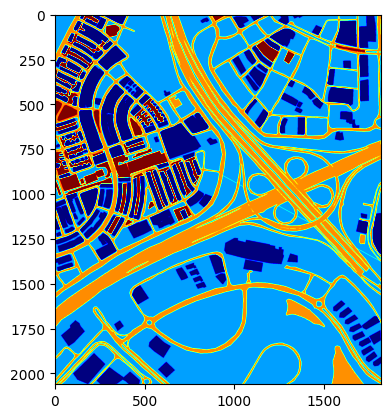

In [ ]:
plt.imshow(ground_truth1_grey,cmap="jet")

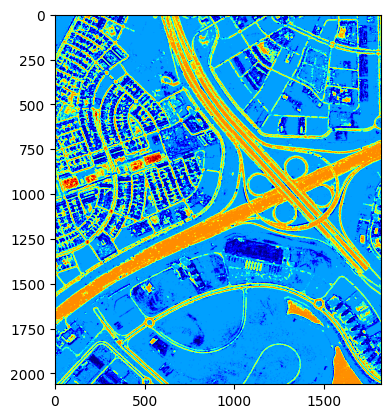

In [ ]:
plt.imshow(final_segmented , cmap="jet")

In [ ]:
imageurl2 = "/content/drive/My Drive/AI-Project/image_part_003.jpg"
groundtruthimage2 = "/content/drive/My Drive/AI-Project/image_part_003.png"

In [ ]:
# import urllib.request

# imageurl="https://www.homemade-gifts-made-easy.com/image-files/xnewspaper-generator-katie-nicholson-old-800x659.jpg.pagespeed.ic.wsKiQMkU82.jpg"
# urllib.request.urlretrieve(imageurl, "img1.jpg")

image2 = cv2.imread(imageurl2)



In [ ]:
#converting to gray
image_grey2=cv2.cvtColor(image2 , cv2.COLOR_BGR2GRAY)

In [ ]:
image_grey2

array([[ 79,  54,  31, ..., 114, 222, 213],
       [ 92,  65,  36, ..., 104, 236, 254],
       [116,  88,  58, ...,  71, 233, 253],
       ...,
       [193, 198, 192, ..., 234, 206, 173],
       [204, 208, 198, ..., 199, 171, 133],
       [211, 212, 201, ..., 166, 143, 129]], dtype=uint8)

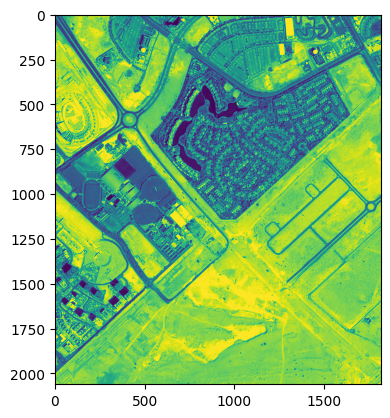

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image_grey2)

In [ ]:
#Creating a dataframe
df2=pd.DataFrame()

In [ ]:
#Adding the features to the dataframe

#1)Adding original pixel values to the dataframe ad feature no. 1
#reahaping the image into 1 dimension by wrapping it so that it can be added to the dataframe
imagegrey2_reshaped = image_grey2.reshape(-1)
df2['Original Image'] = imagegrey2_reshaped


In [ ]:
image_grey2.shape

(2061, 1817)

In [ ]:
len(imagegrey1_reshaped)

3744837

In [ ]:
#2) generating the Gabor features and gabor Feature the the dataframe
num = 1
kernels = []
for theta in range(2):
  theta = theta / 4. * np.pi
  for sigma in (1,3):
    for lamda in np.arange( 0 , np.pi , np.pi/4):
      for gamma in (0.05, 0.5):

        gabor_label = 'Gabor' + str(num)

        ksize = 5
        kernel = cv2.getGaborKernel((ksize,ksize),sigma, theta , lamda , gamma,0,ktype= cv2.CV_32F)
        kernels.append(kernel)
        #now applying the filter on image and adding vales to the new column
        fimg = cv2.filter2D(imagegrey2_reshaped,cv2.CV_8UC3,kernel)
        filtered_img = fimg.reshape(-1)
        df2[gabor_label] = filtered_img
        print(gabor_label , ': theta = ',theta,': sigma = ', ': lamda = ',lamda,": gamma = ",gamma)
        num=num+1






Gabor1 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor2 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor3 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor4 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor5 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor6 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.5
Gabor7 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.05
Gabor8 : theta =  0.0 : sigma =  : lamda =  2.356194490192345 : gamma =  0.5
Gabor9 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.05
Gabor10 : theta =  0.0 : sigma =  : lamda =  0.0 : gamma =  0.5
Gabor11 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.05
Gabor12 : theta =  0.0 : sigma =  : lamda =  0.7853981633974483 : gamma =  0.5
Gabor13 : theta =  0.0 : sigma =  : lamda =  1.5707963267948966 : gamma =  0.05
Gabor14 : theta =  0.0 : sigma =  : l

In [ ]:
df2.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              79       0       0     140     120      42      36      20   
1              54       0       0     142     115      42      34      20   
2              31       0       0     139     105      41      31      19   
3              34       0       0     122      94      36      28      17   
4              49       0       0     115      93      34      28      16   

   Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  \
0      17       0  ...       61       33        0        0      255      255   
1      16       0  ...       77       34        0        0      255      255   
2      15       0  ...       94       31        0        0      255      255   
3      13       0  ...       77       27        0        0      255      255   
4      13       0  ...       61       27        0        0      255      255   

   Gabor29  Gabor30  Gabor31  Gabor32  
0       18       16        0        0  
1       16       13       48       42  
2       36       30       97       88  
3       29       24       71       64  
4       21       18       32       28  

[5 rows x 33 columns]

In [ ]:
#3) Adding Canny Edge filter- edge detection filter
edges = cv2.Canny(image_grey2,100,200)
edges_reshaped = edges.reshape(-1)
df2['Canny Edge'] = edges_reshaped

In [ ]:
df.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             208       0       0     255     255     174     139      82   
1             208       0       0     255     255     174     139      82   
2             208       0       0     255     255     174     139      82   
3             208       0       0     255     255     174     139      82   
4             209       0       0     255     255     175     140      82   

   Gabor8  Gabor9  ...  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  Gabor29  \
0      65       0  ...      135        0        0      255      255      106   
1      65       0  ...      135        0        0      255      255      106   
2      65       0  ...      135        0        0      255      255      106   
3      65       0  ...      135        0        0      255      255      106   
4      66       0  ...      136        0        0      255      255      107   

   Gabor30  Gabor31  Gabor32  Canny Edge  
0       89      243      218           0  
1       89      243      218           0  
2       90      244      218           0  
3       89      245      219           0  
4       90      245      220           0  

[5 rows x 34 columns]

In [ ]:
from skimage.filters import roberts , sobel , scharr , prewitt

In [ ]:
edge_roberts = roberts(image_grey2)
edge_roberts_reshaped = edge_roberts.reshape(-1)
df2['Roberts']=edge_roberts_reshaped

In [ ]:
edge_sobel = sobel(image_grey2)
edge_sobel_reshaped = edge_sobel.reshape(-1)
df2['Sobel']=edge_sobel_reshaped

In [ ]:
edge_scharr = scharr(image_grey2)
edge_scharr_reshaped = edge_scharr.reshape(-1)
df2['Scharr']=edge_scharr_reshaped

In [ ]:
edge_prewitt = prewitt(image_grey2)
edge_prewitt_reshaped = edge_prewitt.reshape(-1)
df2['Prewitt']=edge_prewitt_reshaped

In [ ]:
df.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             255       0       0     255     255     213     170     100   
1             255       0       0     255     255     213     170     100   
2             255       0       0     255     255     213     170     100   
3             255       0       0     255     255     213     170     100   
4             255       0       0     255     255     213     170     100   

   Gabor8  Gabor9  ...  Gabor28  Gabor29  Gabor30  Gabor31  Gabor32  \
0      80       0  ...      255      130      109      255      255   
1      80       0  ...      255      130      109      255      255   
2      80       0  ...      255      130      109      255      255   
3      80       0  ...      255      130      109      255      255   
4      80       0  ...      255      130      109      255      255   

   Canny Edge  Roberts  Sobel  Scharr       Prewitt  
0           0      0.0    0.0     0.0  7.850462e-17  
1           0      0.0    0.0     0.0  7.850462e-17  
2           0      0.0    0.0     0.0  7.850462e-17  
3           0      0.0    0.0     0.0  7.850462e-17  
4           0      0.0    0.0     0.0  7.850462e-17  

[5 rows x 38 columns]

In [ ]:
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(image_grey2,sigma=3)
gaussian_img_reshaped = gaussian_img.reshape(-1)
df2['Gaussian s3']=gaussian_img_reshaped

In [ ]:
gaussian_img2 = nd.gaussian_filter(image_grey2,sigma=7)
gaussian_img2_reshaped = gaussian_img2.reshape(-1)
df2['Gaussian s7']=gaussian_img2_reshaped

In [ ]:
median_img =  nd.median_filter(image_grey2,size=3)
median_img_reshaped = median_img.reshape(-1)
df2['Median s3']=median_img_reshaped

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744837 entries, 0 to 3744836
Data columns (total 41 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Original Image  uint8  
 1   Gabor1          uint8  
 2   Gabor2          uint8  
 3   Gabor3          uint8  
 4   Gabor4          uint8  
 5   Gabor5          uint8  
 6   Gabor6          uint8  
 7   Gabor7          uint8  
 8   Gabor8          uint8  
 9   Gabor9          uint8  
 10  Gabor10         uint8  
 11  Gabor11         uint8  
 12  Gabor12         uint8  
 13  Gabor13         uint8  
 14  Gabor14         uint8  
 15  Gabor15         uint8  
 16  Gabor16         uint8  
 17  Gabor17         uint8  
 18  Gabor18         uint8  
 19  Gabor19         uint8  
 20  Gabor20         uint8  
 21  Gabor21         uint8  
 22  Gabor22         uint8  
 23  Gabor23         uint8  
 24  Gabor24         uint8  
 25  Gabor25         uint8  
 26  Gabor26         uint8  
 27  Gabor27         uint8  
 28  Gabor28     

In [ ]:
ground_truth2=cv2.imread(groundtruthimage2)

In [ ]:
ground_truth1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
ground_truth2.shape

(2061, 1817, 3)

In [ ]:
ground_truth2_grey = cv2.cvtColor(ground_truth2,cv2.COLOR_BGR2GRAY)
ground_truth2_grey

array([[ 92, 172, 172, ...,  45,  45,  45],
       [ 92,  92, 172, ...,  45,  45,  45],
       [ 92,  92, 172, ...,  45,  45,  45],
       ...,
       [ 92,  92,  92, ...,  92,  92,  92],
       [ 92,  92,  92, ...,  92,  92,  92],
       [ 92,  92,  92, ...,  92,  92,  92]], dtype=uint8)

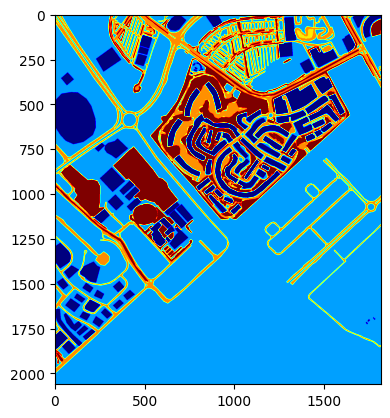

In [ ]:
plt.imshow(ground_truth2_grey,cmap="jet")

In [ ]:
df2.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              79       0       0     140     120      42      36      20   
1              54       0       0     142     115      42      34      20   
2              31       0       0     139     105      41      31      19   
3              34       0       0     122      94      36      28      17   
4              49       0       0     115      93      34      28      16   

   Gabor8  Gabor9  ...  Gabor31  Gabor32  Canny Edge   Roberts     Sobel  \
0      17       0  ...        0        0         255  0.112297  0.078749   
1      16       0  ...       48       42         255  0.106678  0.141394   
2      15       0  ...       97       88           0  0.014933  0.069220   
3      13       0  ...       71       64           0  0.063778  0.040304   
4      13       0  ...       32       28           0  0.041223  0.050773   

     Scharr   Prewitt  Gaussian s3  Gaussian s7  Median s3  
0  0.078592  0.078963           72           79         79  
1  0.140174  0.143031           69           79         54  
2  0.066133  0.073395           65           78         34  
3  0.043873  0.035559           60           77         34  
4  0.052077  0.049302           55           76         44  

[5 rows x 41 columns]

In [ ]:
prediction2 = model.predict(df2)

In [ ]:
final_segmented2 = prediction2.reshape(image_grey2.shape)

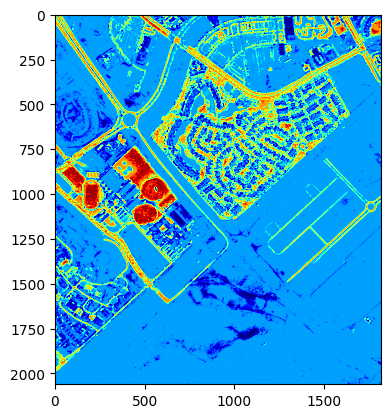

In [ ]:
plt.imshow(final_segmented2 , cmap="jet")

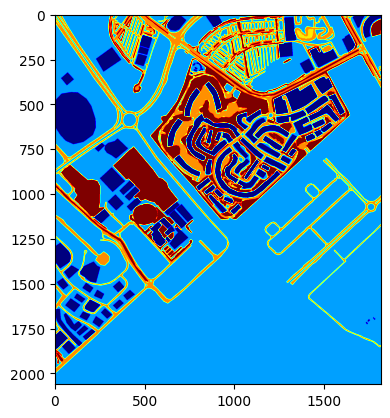

In [ ]:
plt.imshow(ground_truth2_grey,cmap="jet")

**Using the Support vector Classifier**

In [ ]:
!pip install tensorflow_datasets

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data,info=tfds.load('oxford_iiit_pet:3.*.*', with_info=True)
dataset=tfds.as_numpy(data)
n=np.array([x for x in dataset['train']])
t=np.array([x for x in dataset['test']])

print(n.shape,t.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

**Train data for cats and dogs**

In [ ]:
cats,dogs=[],[]
for x in n:
    if x['species']==0:
        cats.append(x)
    else:
        dogs.append(x)

**Test data for cats and dogs**

In [ ]:
t_cats,t_dogs=[],[]
for x in t:
    if x['species']==0:
        t_cats.append(x)
    else:
        t_dogs.append(x)

In [ ]:
# Taking first 25 images for training
image_number=25

# Train Dataset
d_x_train=np.array([tf.image.resize(x['image'],(128,128))for x in dogs[:image_number]])
d_y_train=np.array([tf.image.resize(x['segmentation_mask'],(128,128))for x in dogs[:image_number]])

c_x_train=np.array([tf.image.resize(x['image'],(128,128))for x in cats[:image_number]])
c_y_train=np.array([tf.image.resize(x['segmentation_mask'],(128,128))for x in cats[:image_number]])

# Test Dataset
d_x_test=np.array([tf.image.resize(x['image'],(128,128))for x in t_dogs[:image_number]])
d_y_test=np.array([tf.image.resize(x['segmentation_mask'],(128,128))for x in t_dogs[:image_number]])

c_x_test=np.array([tf.image.resize(x['image'],(128,128))for x in t_cats[:image_number]])
c_y_test=np.array([tf.image.resize(x['segmentation_mask'],(128,128))for x in t_cats[:image_number]])



c_y_train[c_y_train==3]=2
d_y_train[d_y_train==3]=2

c_y_test[c_y_test==3]=2
d_y_test[d_y_test==3]=2

# Reshaping elements in Cat dataset for training
cat_x=c_x_train.reshape([-1,3])
cat_y=(c_y_train.reshape([-1,])).astype(np.int16)

# Reshaping elements in Dog dataset for training
dog_x=d_x_train.reshape([-1,3])
dog_y=(d_y_train.reshape([-1,])).astype(np.int16)

**Cat Image Segmentation**

In [ ]:
from sklearn import svm

clf_cat = svm.SVC(kernel='rbf', gamma=0.001, C=1)

In [ ]:
clf_cat.fit(cat_x, cat_y)

**Using K Means Clustering**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imageurl = "/content/drive/My Drive/AI-Project/image_part_001.jpg"
groundtruthimage = "/content/drive/My Drive/AI-Project/image_part_001.png"

In [ ]:
image = mpl.image.imread(imageurl)
groundtruth = mpl.image.imread(groundtruthimage)

In [ ]:
image.shape

(2061, 1817, 3)

In [ ]:
groundtruth.shape

(2061, 1817, 3)

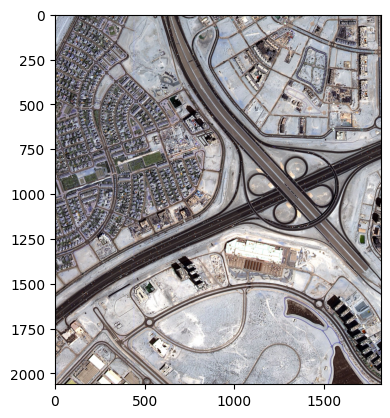

In [ ]:
plt.imshow(image)

In [ ]:
X = image.reshape(-1,3)
X.shape

(3744837, 3)

In [ ]:
kmeans = KMeans(n_clusters=5,n_init=10, random_state=42)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
import numpy as np
labels=kmeans.labels_

color_palette = np.array([
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [0, 255, 255]   # Cyan
])

segmented_image_colored = color_palette[labels]

segmented_image_colored = segmented_image_colored.reshape(image.shape)



In [ ]:
# segmented_image = kmeans.cluster_centers_[kmeans.labels_]
# segmented_image_final = segmented_image.reshape(image.shape)

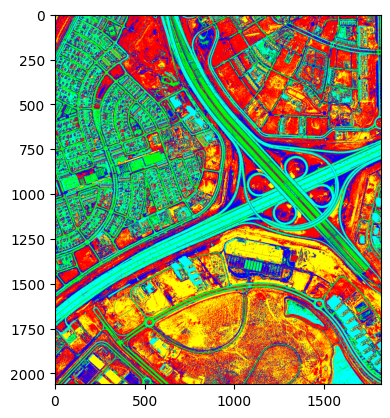

In [ ]:
plt.imshow(segmented_image_colored / 255 )

In [ ]:
print(image)

[[[  0  77 121]
  [  0  79 123]
  [  0  81 126]
  ...
  [ 44  63 119]
  [ 41  69 117]
  [ 41  74 119]]

 [[  4  88 132]
  [  5  89 133]
  [  7  90 134]
  ...
  [ 46  69 119]
  [ 40  71 117]
  [ 39  72 115]]

 [[  5  92 137]
  [  5  92 137]
  [  6  90 136]
  ...
  [ 35  70 110]
  [ 38  72 110]
  [ 40  72 110]]

 ...

 [[176 116  88]
  [182 128 102]
  [173 127 111]
  ...
  [108  82  83]
  [ 90  66  66]
  [ 95  74  73]]

 [[174 117  88]
  [163 109  83]
  [168 122 106]
  ...
  [108  82  83]
  [ 68  44  44]
  [ 62  41  40]]

 [[176 119  90]
  [166 115  88]
  [169 123 107]
  ...
  [105  79  80]
  [ 53  29  29]
  [ 42  21  20]]]


**Evaluating the segmentation accuracy**

In [ ]:
from scipy.stats import mode

# def map_clusters_to_ground_truth(segmented_image, ground_truth):
#     mapped_image = np.zeros_like(segmented_image[..., 0])
#     for i in range(kmeans.n_clusters):
#         mask = (segmented_image == kmeans.cluster_centers_[i]).all(axis=-1).astype(int)
#         print(mask)
#         gt_values = ground_truth[mask]
#         if len(gt_values) > 0:
#             # Assign the most common value in the ground truth to this cluster
#             mapped_image[mask] = mode(gt_values, axis=None).mode[0]
#     return mapped_image

def map_clusters_to_ground_truth(segmented_image, ground_truth):
    # Initialize the mapped image
    mapped_image = np.zeros_like(segmented_image[..., 0], dtype=np.int32)
    for i in range(kmeans.n_clusters):
        # Create a boolean mask for pixels belonging to the current cluster
        mask = np.all((segmented_image == kmeans.cluster_centers_[i]), axis=-1)
        print(mask)
        print(type(mask))
        # Get the ground truth values corresponding to the mask
        gt_values = ground_truth[mask]

        if len(gt_values) > 0:
            # Assign the most common value in the ground truth to this cluster
            mapped_image[mask] = mode(gt_values, axis=None).mode[0]
    return mapped_image

def pixel_accuracy(segmented, ground_truth):
    correct_pixels = np.sum(segmented == ground_truth)
    total_pixels = len(ground_truth)
    return correct_pixels / total_pixels

def iou(segmented, ground_truth):
    intersection = np.logical_and(segmented, ground_truth)
    union = np.logical_or(segmented, ground_truth)
    return np.sum(intersection) / np.sum(union)

def dice_coefficient(segmented, ground_truth):
    intersection = np.sum(segmented * ground_truth)
    return (2.0 * intersection) / (np.sum(segmented) + np.sum(ground_truth))

# mapped_image = map_clusters_to_ground_truth(segmented_image_colored , groundtruthimage)

accuracy = pixel_accuracy(segmented_image_colored , groundtruthimage)
# iou_score = iou(segmented_image_colored , groundtruthimage)
# dice_score = dice_coefficient(segmented_image_colored , groundtruthimage)

# dice_score = dice_coefficient(mapped_image, ground_truth)

print(f"Accuracy: {accuracy * 100:.2f}%")
# print(f"IoU: {iou_score * 100:.2f}%")
# print(f"Dice Coefficient: {dice_score:.2f}")



Accuracy: 0.00%


**Using the Color Space**

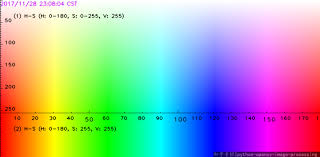

In [ ]:
import cv2
import numpy as np
from skimage import io, measure

In [ ]:
image = "/content/drive/My Drive/AI-Project/sample3.jpg"

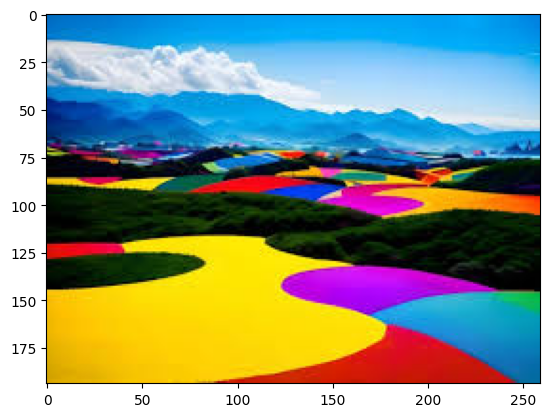

In [ ]:
img = io.imread(image)
plt.imshow(img)

In [ ]:
#convert to hue saturation view(hsv)
hsv= cv2.cvtColor(img , cv2.COLOR_RGB2HSV)
blue_mask = cv2.inRange(hsv , (100,90,90) , (125,255,255))#for blue
yellow_mask = cv2.inRange(hsv , (25,200,90),(35,255,255))#for yellow
green_mask = cv2.inRange(hsv , (50,200,90),(70,255,255))# for green
red_mask = cv2.inRange(hsv , (175,225,90),(180,255,255))#for red

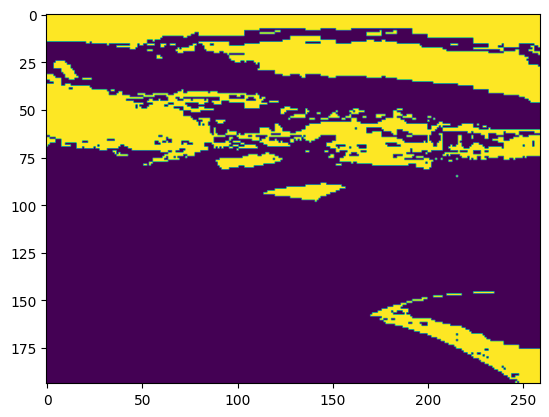

In [ ]:
plt.imshow(blue_mask)

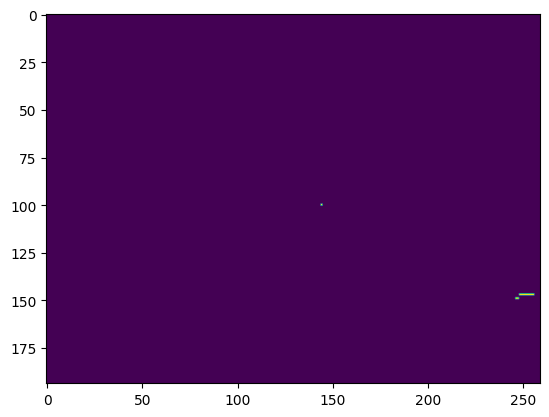

In [ ]:
plt.imshow(green_mask)

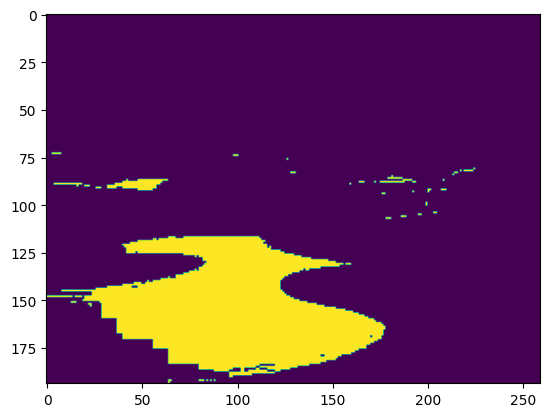

In [ ]:
plt.imshow(yellow_mask)

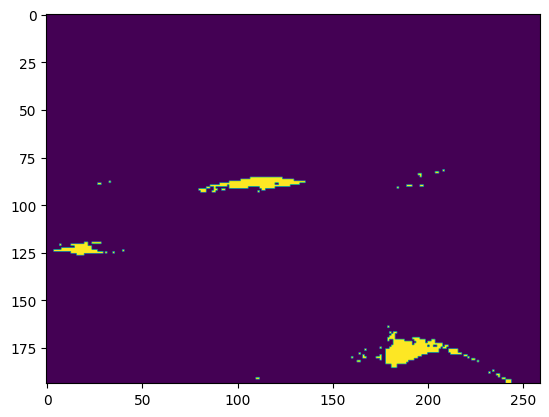

In [ ]:
plt.imshow(red_mask)

In [ ]:
from scipy import ndimage as nd
blue_closed_mask = nd.binary_closing(blue_mask , np.ones((7,7)))
yellow_closed_mask = nd.binary_closing(yellow_mask , np.ones((7,7)))
green_closed_mask = nd.binary_closing(green_mask , np.ones((7,7)))
red_closed_mask = nd.binary_closing(red_mask , np.ones((7,7)))


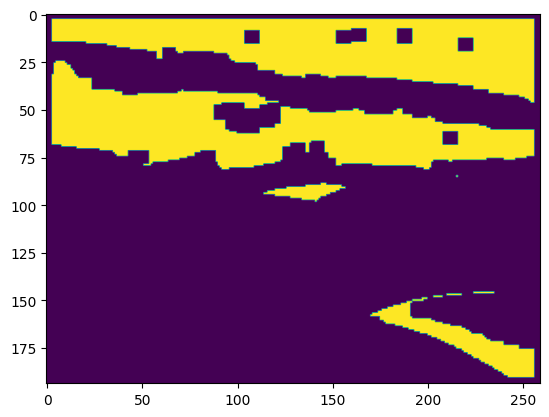

In [ ]:
plt.imshow(blue_closed_mask)

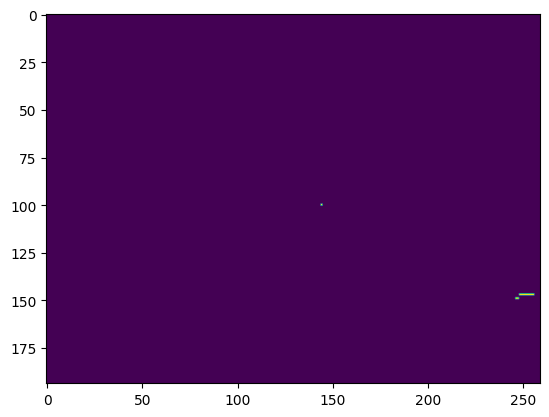

In [ ]:
plt.imshow(green_closed_mask)

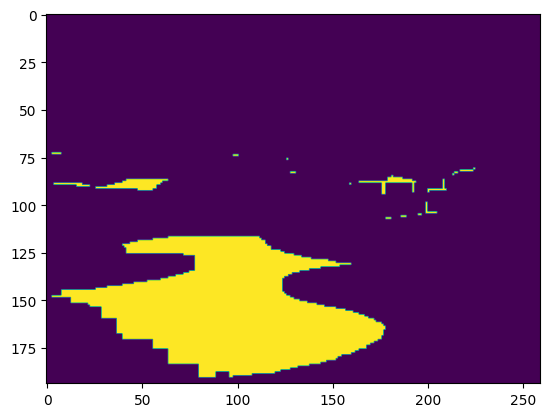

In [ ]:
plt.imshow(yellow_closed_mask)

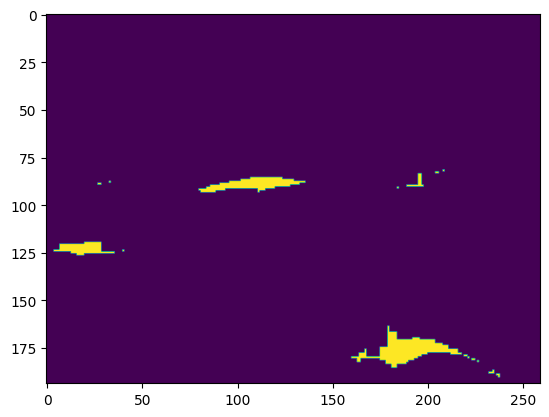

In [ ]:
plt.imshow(red_closed_mask)

In [ ]:
blue_label_image = measure.label(blue_closed_mask)
green_label_image = measure.label(green_closed_mask)
yellow_label_image = measure.label(yellow_closed_mask)
red_label_image = measure.label(red_closed_mask)

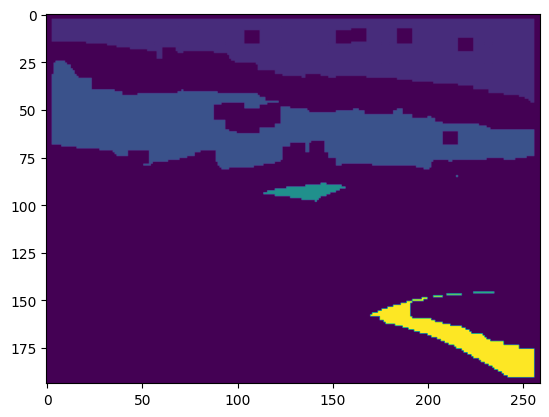

In [ ]:
plt.imshow(blue_label_image)

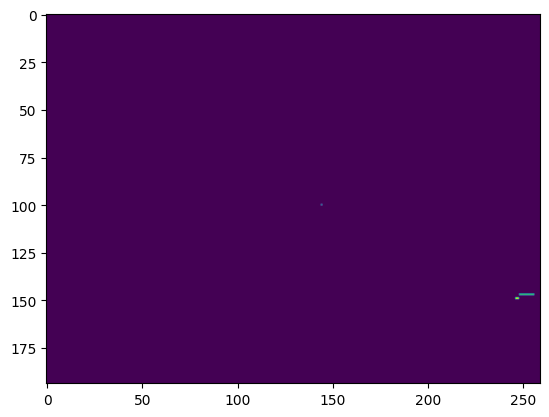

In [ ]:
plt.imshow(green_label_image)

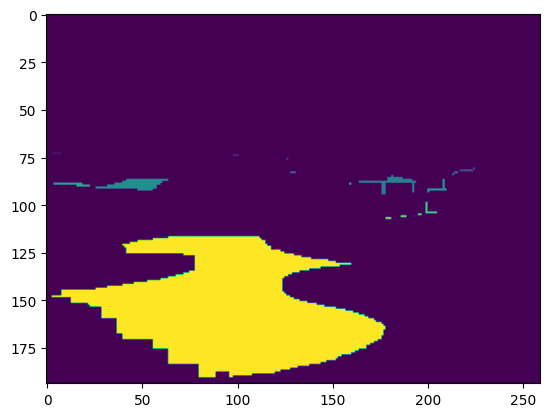

In [ ]:
plt.imshow(yellow_label_image)

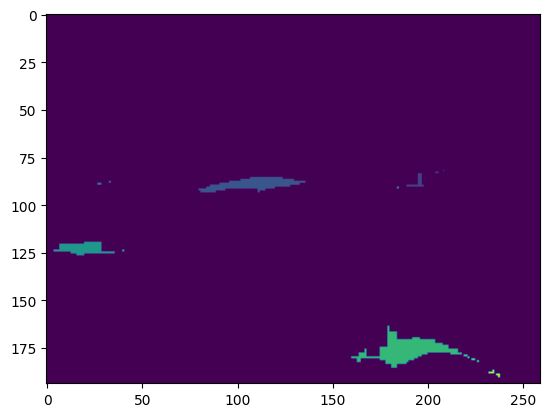

In [ ]:
plt.imshow(red_label_image)

In [ ]:
from skimage.color import label2rgb
blue_image_overlay = label2rgb(blue_label_image,image = img,bg_label=1,bg_color=(53/255,3/255,252/255))
green_image_overlay = label2rgb(green_label_image,image = img,bg_label=1,bg_color = (19/255,222/255,5/255))
yellow_image_overlay = label2rgb(yellow_label_image,image = img,bg_label=1, bg_color =(235/255,252/255,3/255))
red_image_overlay = label2rgb(red_label_image,image = img,bg_label=1, bg_color =(252/255,3/255,3/255))

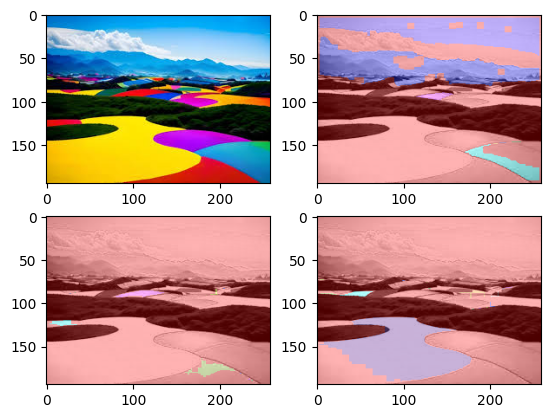

In [ ]:
f,axarr = plt.subplots(2,2)
axarr[0,0].imshow(img)
axarr[0,1].imshow(blue_image_overlay)
axarr[1,0].imshow(red_image_overlay)
axarr[1,1].imshow(yellow_image_overlay)

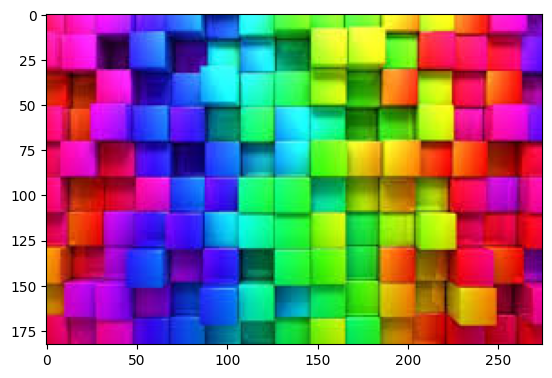

In [ ]:
plt.imshow(img)